In [1]:
import pandas as pd

In [2]:
PATH_WINDOWS = '..\\data\\round1\\prices_round_'
PATH_LINUX = '..\data\round1\prices_round_'

In [3]:
path = PATH_WINDOWS
round = 1

data0 = pd.read_csv(filepath_or_buffer = f'{path}{round}_day_0.csv', sep=';')
data1 = pd.read_csv(filepath_or_buffer = f'{path}{round}_day_-1.csv', sep=';')
data2 = pd.read_csv(filepath_or_buffer = f'{path}{round}_day_-2.csv', sep=';')

In [4]:
data_banana0 = data0.loc[data0['product'] == 'BANANAS']
data_banana1 = data1.loc[data1['product'] == 'BANANAS']
data_banana2 = data2.loc[data2['product'] == 'BANANAS']

In [5]:
data_pearls = data0[data0['product'] == 'PEARLS']

In [23]:
data_pearls

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
2,0,100,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,2.0
4,0,200,PEARLS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,2.0
6,0,300,PEARLS,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,2.0
8,0,400,PEARLS,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,PEARLS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,-400.0
19992,0,999600,PEARLS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,-408.0
19994,0,999700,PEARLS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,-408.0
19996,0,999800,PEARLS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,-408.0


# Spread in banans

In [16]:
data_banana0['spread'] = data_banana0['bid_price_1'] - data_banana0['ask_price_1']
data_banana1['spread'] = data_banana1['bid_price_1'] - data_banana1['ask_price_1']
data_banana2['spread'] = data_banana2['bid_price_1'] - data_banana2['ask_price_1']

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20128\1735871635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_banana0['spread'] = data_banana0['bid_price_1'] - data_banana0['ask_price_1']
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20128\1735871635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_banana1['spread'] = data_banana1['bid_price_1'] - data_banana1['ask_price_1']
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20128\1735871635.py:3: SettingWithCopyWarning: 
A value is trying to b

In [14]:
data_banana0['spread'].describe()

count    10000.00000
mean        -5.26270
std          1.88405
min         -7.00000
25%         -7.00000
50%         -6.00000
75%         -5.00000
max         -1.00000
Name: spread, dtype: float64

In [17]:
data_banana1['spread'].describe()

count    10000.000000
mean        -5.292200
std          1.905356
min         -7.000000
25%         -7.000000
50%         -6.000000
75%         -5.000000
max         -1.000000
Name: spread, dtype: float64

In [18]:
data_banana2['spread'].describe()

count    10000.000000
mean        -5.324800
std          1.922362
min         -7.000000
25%         -7.000000
50%         -6.000000
75%         -5.000000
max         -1.000000
Name: spread, dtype: float64

<Axes: >

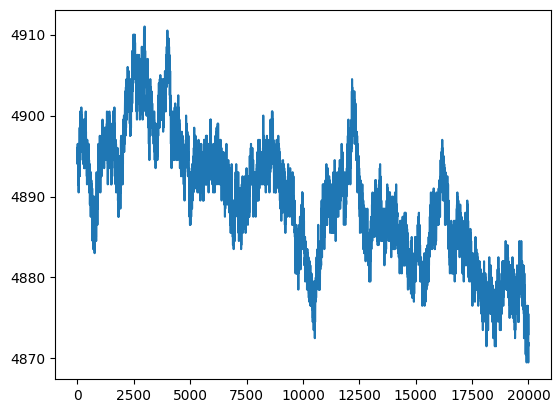

In [40]:
data_banana0['mid_price'].plot()

<Axes: >

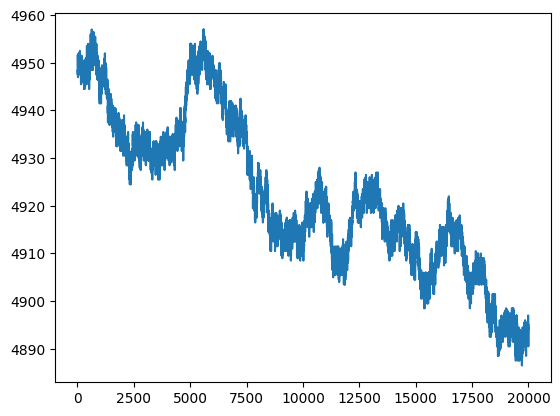

In [41]:
data_banana1['mid_price'].plot()

<Axes: >

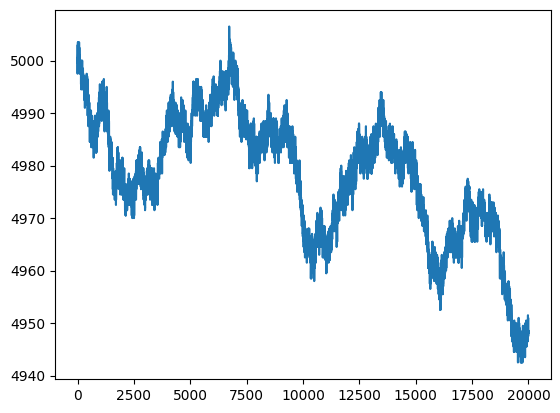

In [42]:
data_banana2['mid_price'].plot()

# Order distribution in bananas

In [20]:
data_banana0['n_bids'] = data_banana0['bid_price_1'] + data_banana0['bid_price_2'] + data_banana0['bid_price_3']
data_banana0['n_asks'] = data_banana0['ask_price_1'] + data_banana0['ask_price_2'] + data_banana0['ask_price_3']

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20128\2984336598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_banana0['n_bids'] = data_banana0['bid_price_1'] + data_banana0['bid_price_2'] + data_banana0['bid_price_3']
C:\Users\Nicolas\AppData\Local\Temp\ipykernel_20128\2984336598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_banana0['n_asks'] = data_banana0['ask_price_1'] + data_banana0['ask_price_2'] + data_banana0['ask_price_3']


In [21]:
data_banana0['n_bids'].describe()

count      384.000000
mean     14665.046875
std         23.531722
min      14614.000000
25%      14646.000000
50%      14665.000000
75%      14680.000000
max      14719.000000
Name: n_bids, dtype: float64

In [22]:
data_banana0['n_asks'].describe()

count      490.000000
mean     14675.351020
std         22.829752
min      14620.000000
25%      14658.000000
50%      14676.000000
75%      14691.000000
max      14730.000000
Name: n_asks, dtype: float64

<Axes: >

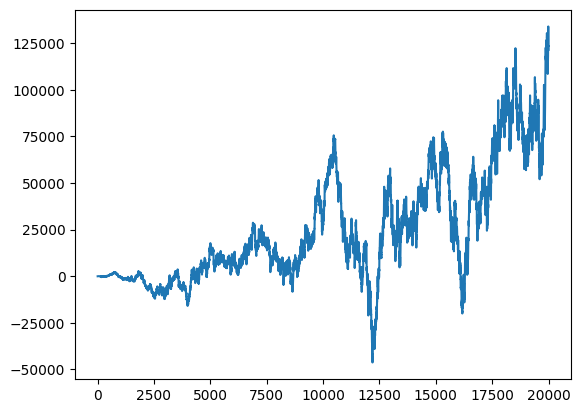

In [28]:
data_banana0['profit_and_loss'].plot()

In [26]:
trades = pd.read_csv('..\\data\\round1\\trades_round_1_day_-1_nn.csv', sep = ';')

In [30]:
trades['seller'].value_counts(dropna=False)

NaN    5279
Name: seller, dtype: int64